In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import numpy as np
from tensorflow.keras.preprocessing import image
from tqdm import tqdm

In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


- https://www.pyimagesearch.com/2020/10/19/adversarial-images-and-attacks-with-keras-and-tensorflow/
- http://image-net.org/challenges/LSVRC/2014/browse-synsets

In [3]:
def make_square(im_rgb, desired_size = 224):
#     im_pth = "/home/jdhao/test.jpg"
#     im = cv2.imread(im_pth)

    im = im_rgb
    old_size = im.shape[:2] # old_size is in (height, width) format

    ratio = float(desired_size)/max(old_size)
    new_size = tuple([int(x*ratio) for x in old_size])

    # new_size should be in (width, height) format
    im = cv2.resize(im, (new_size[1], new_size[0]))

    delta_w = desired_size - new_size[1]
    delta_h = desired_size - new_size[0]
    top, bottom = delta_h//2, delta_h-(delta_h//2)
    left, right = delta_w//2, delta_w-(delta_w//2)

    color = [0, 0, 0]
    new_im = cv2.copyMakeBorder(im, top, bottom, left, right, cv2.BORDER_CONSTANT,
        value=color)
    return new_im

In [4]:
# from tensorflow.keras.applications.resnet_v2 import preprocess_input, decode_predictions
# model = tf.keras.applications.ResNet152V2(
#     include_top=True,
#     weights="imagenet",
#     input_tensor=None,
#     input_shape=None,
#     pooling=None,
#     classes=1000,
#     classifier_activation="softmax",
# )
#
# def depreprocess(x):
#     xx = x.copy()
#     xx +=1
#     xx *= 127.5
#     return xx


from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
model = tf.keras.applications.ResNet50(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)
def depreprocess(x):
    mean = [103.939, 116.779, 123.68]
    x1 = x[:,:,::-1].copy()
    x1[..., 0] += mean[2]
    x1[..., 1] += mean[1]
    x1[..., 2] += mean[0]
    return x1#[:,:,::-1]

In [5]:
# im = plt.imread('../brad_samples/2097157039_872012429d.jpg')
# new_im = make_square(im)
# plt.figure()
# plt.imshow(new_im)

In [6]:
import os

In [7]:
# imgs_path = '/data/datasets/imagenet2012/n02319095/' #sea_urchin
imgs_path = '/data/datasets/imagenet2012/n02398521/'
valid_imgs = [x for x in os.listdir(imgs_path) if x.split('.')[-1] != 'json']

In [8]:
# imgs_path = '/data/datasets/imagenet2012/n02319095/'
# 
# ims = []
# for i in valid_imgs:
#     i_path = '{}/{}'.format(imgs_path,i)
#     im_ar =  image.img_to_array(image.load_img(i_path, target_size=(224, 224)))
#     ims.append(im_ar)
# # img = 
# # x = image.img_to_array(img)
# # x = np.expand_dims(x, axis=0)
# x = np.array(ims)
# x = preprocess_input(x)

# preds = model.predict(x)
# # decode the results into a list of tuples (class, description, probability)
# # (one such list for each sample in the batch)
# print('Predicted:', decode_predictions(preds, top=10)[0])

In [9]:
# orig_pred = decode_predictions(preds, top=5)
# for pred in orig_pred:
#     print(pred)

In [10]:
preds_codes = decode_predictions(np.expand_dims(np.zeros(1000), axis=0), top=1000)[0]

In [11]:
preds_codes

[('n15075141', 'toilet_tissue', 0.0),
 ('n02319095', 'sea_urchin', 0.0),
 ('n02395406', 'hog', 0.0),
 ('n02391049', 'zebra', 0.0),
 ('n02389026', 'sorrel', 0.0),
 ('n02364673', 'guinea_pig', 0.0),
 ('n02363005', 'beaver', 0.0),
 ('n02361337', 'marmot', 0.0),
 ('n02356798', 'fox_squirrel', 0.0),
 ('n02346627', 'porcupine', 0.0),
 ('n02342885', 'hamster', 0.0),
 ('n02328150', 'Angora', 0.0),
 ('n02326432', 'hare', 0.0),
 ('n02325366', 'wood_rabbit', 0.0),
 ('n02321529', 'sea_cucumber', 0.0),
 ('n02317335', 'starfish', 0.0),
 ('n02229544', 'cricket', 0.0),
 ('n02281787', 'lycaenid', 0.0),
 ('n02281406', 'sulphur_butterfly', 0.0),
 ('n02280649', 'cabbage_butterfly', 0.0),
 ('n02279972', 'monarch', 0.0),
 ('n02277742', 'ringlet', 0.0),
 ('n02276258', 'admiral', 0.0),
 ('n02268853', 'damselfly', 0.0),
 ('n02268443', 'dragonfly', 0.0),
 ('n02264363', 'lacewing', 0.0),
 ('n02259212', 'leafhopper', 0.0),
 ('n02256656', 'cicada', 0.0),
 ('n02236044', 'mantis', 0.0),
 ('n02233338', 'cockroach', 0

#### now lets add some adversarial noise

https://github.com/keras-team/keras-preprocessing/blob/master/keras_preprocessing/image/utils.py

preprocess input resnet v2
- https://github.com/tensorflow/tensorflow/blob/efb5a568e9de274840ae313c034c8ea70e222bbb/tensorflow/python/keras/applications/resnet_v2.py#L125
- https://github.com/tensorflow/tensorflow/blob/efb5a568e9de274840ae313c034c8ea70e222bbb/tensorflow/python/keras/applications/imagenet_utils.py#L104
- https://github.com/tensorflow/tensorflow/blob/efb5a568e9de274840ae313c034c8ea70e222bbb/tensorflow/python/keras/applications/imagenet_utils.py#L169

preprocess input resnet
- https://github.com/tensorflow/tensorflow/blob/efb5a568e9de274840ae313c034c8ea70e222bbb/tensorflow/python/keras/applications/resnet.py#L519

In [12]:
from PIL import Image

In [13]:
from PIL import Image, ImageOps
def square_image(pil_im, desired_size = 224):
    if isinstance(pil_im, Image.Image):
        im = pil_im
    elif isinstance(pil_im, str):
        im = Image.open(pil_im)  
    else:
        raise Exception('invalid image type')
    old_size = im.size 

    ratio = float(desired_size)/max(old_size)
    new_size = tuple([int(x*ratio) for x in old_size])
    im = im.resize(new_size, Image.ANTIALIAS)
    new_im = Image.new("RGB", (desired_size, desired_size))
    new_im.paste(im, ((desired_size-new_size[0])//2,
                        (desired_size-new_size[1])//2))
    return new_im

def center_crop_square(pil_im, desired_size = 224):        
    if isinstance(pil_im, Image.Image):
        im = pil_im.copy()
    elif isinstance(pil_im, str):
        im = Image.open(pil_im)  
    else:
        raise Exception('invalid image type')
    new_width, new_height = [min(im.size)] *2   
    width, height = im.size   # Get dimensions

    left = (width - new_width)/2
    top = (height - new_height)/2
    right = (width + new_width)/2
    bottom = (height + new_height)/2

    # Crop the center of the image
    im = im.crop((left, top, right, bottom))
    im.thumbnail([desired_size, desired_size], Image.ANTIALIAS)
    return im

In [14]:
# vi = valid_imgs[0]
# i_path = '{}/{}'.format(imgs_path,vi)
# i_path = '/home/ivan/Dropbox/scratch/hog_test.png'
i_path = '/home/ivan/scratch/marmot.jpg'
# i_path = '/home/ivan/scratch/guitarra_electrica.jpg'
# ii = image.load_img(i_path, target_size=(224, 224), )
im_pil_raw_squared = center_crop_square(i_path, desired_size=224)
im_ar =  image.img_to_array(im_pil_raw_squared).copy()
im_ar_prec = preprocess_input(np.expand_dims(im_ar.copy(), axis=0))[0]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


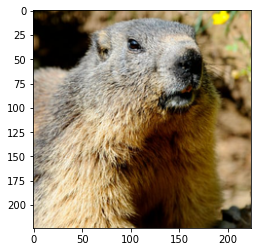

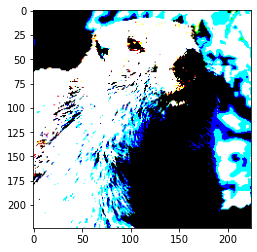

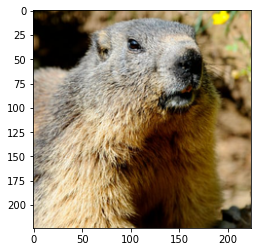

In [15]:
plt.figure()
plt.imshow(im_ar/255)
plt.figure()
plt.imshow(im_ar_prec)
plt.figure()
plt.imshow(depreprocess(im_ar_prec)/255)

In [16]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy

https://www.tensorflow.org/tutorials/generative/adversarial_fgsm

In [17]:
EPS = 3 / 255.0
LR = 0.1
# EPS = 0.001
# LR = 0.05
optimizer = Adam(learning_rate=LR)
# lossfn = SparseCategoricalCrossentropy()
lossfn = CategoricalCrossentropy()

def clip_eps(tensor, eps):
    # clip the values of the tensor to a given range and return it
    return tf.clip_by_value(tensor, clip_value_min=-eps,
        clip_value_max=eps)

choices = 3

def generate_adversaries(model, baseImage, delta, classIdx, steps=50, verbose=False):
    ty = np.zeros(1000)
    ty[classIdx] = 1
#    # multi labels
#     aa = np.random.choice(np.arange(1000),choices)
#     for a in aa:
#         ty[a] = 1/choices
    ty = np.expand_dims(ty, axis=0)
    for step in range(0, steps):
        with tf.GradientTape() as tape:
            tape.watch(delta)
            adversary = baseImage + preprocess_input(delta)
            predictions = model(adversary, training=False)
            loss = lossfn(tf.convert_to_tensor(ty), predictions)                        
            if verbose and step % 10 == 0:
                print("step: {}, loss: {}...".format(step,
                    loss.numpy()))
        # calculate the gradients of loss with respect to the perturbation vector
        gradients = tape.gradient(loss, delta)
        # update the weights, clip the perturbation vector, and
        # update its value
        optimizer.apply_gradients([(gradients, delta)])
        delta.assign_add(clip_eps(delta, eps=EPS))
    return delta            

In [18]:
# ii = image.load_img(i_path, target_size=(224, 224))
# ii = image.load_img(i_path, target_size=(224, 224))
im_ar =  image.img_to_array(im_pil_raw_squared).copy()
im_proc = preprocess_input(np.expand_dims(im_ar.copy(), axis=0))

baseImage = tf.constant(im_proc, dtype=tf.float32)
delta = tf.Variable(tf.zeros_like(baseImage), trainable=True)
deltaUpdated = generate_adversaries(model, baseImage, delta, 245, steps=200, verbose=True)

adverImage = (baseImage + deltaUpdated).numpy().squeeze()
adverImage = np.clip(adverImage, 0, 255).astype("uint8")

step: 0, loss: 24.460037231445312...
step: 10, loss: 10.036124229431152...
step: 20, loss: 4.1750664710998535...
step: 30, loss: 0.379038542509079...
step: 40, loss: 0.023634031414985657...
step: 50, loss: 0.00724048400297761...
step: 60, loss: 0.004277959931641817...
step: 70, loss: 0.003313648048788309...
step: 80, loss: 0.0029057920910418034...
step: 90, loss: 0.002692409558221698...
step: 100, loss: 0.002532372483983636...
step: 110, loss: 0.0024284415412694216...
step: 120, loss: 0.002323905238881707...
step: 130, loss: 0.0022238779347389936...
step: 140, loss: 0.0021415650844573975...
step: 150, loss: 0.002107067732140422...
step: 160, loss: 0.0020650746300816536...
step: 170, loss: 0.002018558792769909...
step: 180, loss: 0.0019814397674053907...
step: 190, loss: 0.001950387260876596...


[('n02361337', 'marmot', 0.99636286), ('n02363005', 'beaver', 0.0035085368), ('n02444819', 'otter', 4.556042e-05)]


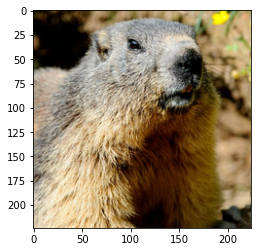

______________
[('n03291819', 'envelope', 0.13212542), ('n04548280', 'wall_clock', 0.11673584), ('n07248320', 'book_jacket', 0.05643378)]


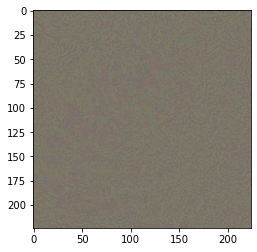

______________
[('n02361337', 'marmot', 0.99636286), ('n02363005', 'beaver', 0.0035085368), ('n02444819', 'otter', 4.556042e-05)]


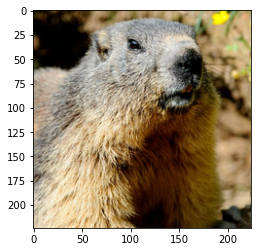

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


______________
[('n02444819', 'otter', 0.2013188), ('n02361337', 'marmot', 0.18884468), ('n02134084', 'ice_bear', 0.11929439)]


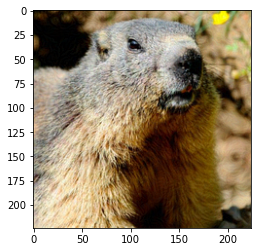

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


______________
[('n02444819', 'otter', 0.098870724), ('n01833805', 'hummingbird', 0.07101168), ('n02108915', 'French_bulldog', 0.056403402)]


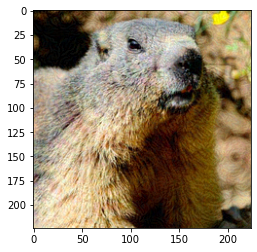

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


______________
[('n01833805', 'hummingbird', 0.22260404), ('n02444819', 'otter', 0.06545608), ('n09256479', 'coral_reef', 0.040395293)]


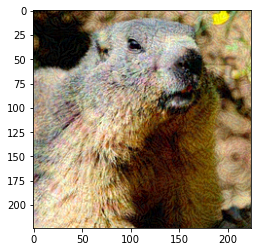

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


______________
[('n01833805', 'hummingbird', 0.47795182), ('n01806143', 'peacock', 0.05741025), ('n01917289', 'brain_coral', 0.046838563)]


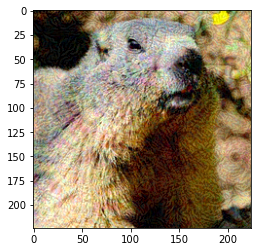

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


______________
[('n01833805', 'hummingbird', 0.558864), ('n01806143', 'peacock', 0.10258178), ('n01917289', 'brain_coral', 0.032242484)]


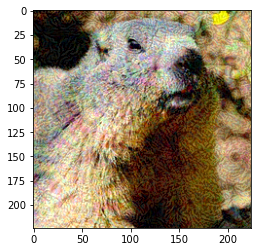

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


______________
[('n01833805', 'hummingbird', 0.2944803), ('n01806143', 'peacock', 0.26379576), ('n02396427', 'wild_boar', 0.06173066)]


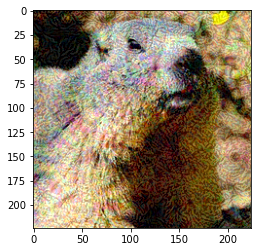

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


______________
[('n01806143', 'peacock', 0.20425296), ('n02396427', 'wild_boar', 0.16604587), ('n01917289', 'brain_coral', 0.14632145)]


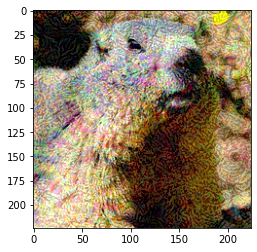

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


______________
[('n01917289', 'brain_coral', 0.41946524), ('n09256479', 'coral_reef', 0.1248423), ('n02396427', 'wild_boar', 0.106247544)]


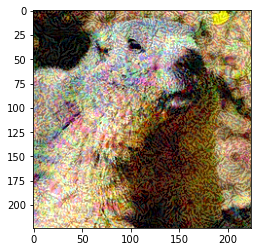

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


______________
[('n01917289', 'brain_coral', 0.6978573), ('n09256479', 'coral_reef', 0.15490225), ('n02396427', 'wild_boar', 0.015190203)]


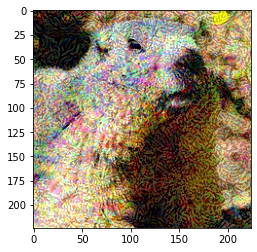

______________


In [19]:
ims_test = [baseImage, deltaUpdated]
for i in range(10):
    ims_test.append(baseImage + i* deltaUpdated)

ims_test = np.concatenate(ims_test,axis=0)
preds_all = model.predict(ims_test)

for ii, p in zip(ims_test, decode_predictions(preds_all, top=3)):
    plt.figure()
    plt.imshow(np.round(depreprocess(ii)).astype('int32'))
    print(p)
    plt.show()
    print('______________')

### Brute force loop

  0%|          | 0/4 [00:00<?, ?it/s]

[('n02361337', 'marmot', 0.99636286), ('n02363005', 'beaver', 0.0035085368), ('n02444819', 'otter', 4.556007e-05)]


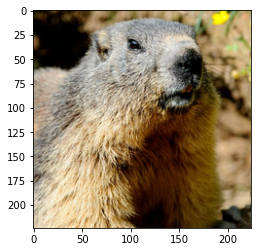

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


______________
[('n02361337', 'marmot', 0.591147), ('n02134084', 'ice_bear', 0.12861273), ('n02444819', 'otter', 0.077271655)]


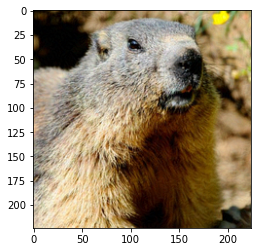

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


______________
[('n02134084', 'ice_bear', 0.27892253), ('n02444819', 'otter', 0.09022235), ('n02132136', 'brown_bear', 0.08758153)]


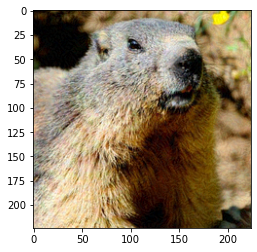

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


______________
[('n01833805', 'hummingbird', 0.25092652), ('n02117135', 'hyena', 0.15678175), ('n02396427', 'wild_boar', 0.09127199)]


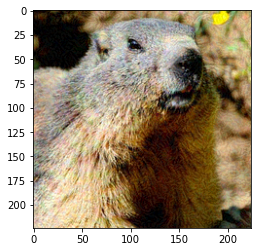

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


______________
[('n01833805', 'hummingbird', 0.43731716), ('n02117135', 'hyena', 0.09639796), ('n02396427', 'wild_boar', 0.081941344)]


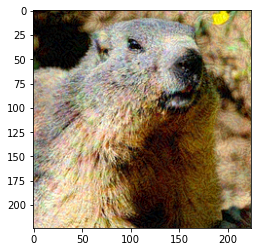

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


______________
[('n01833805', 'hummingbird', 0.5313603), ('n01806143', 'peacock', 0.101073384), ('n02396427', 'wild_boar', 0.06881545)]


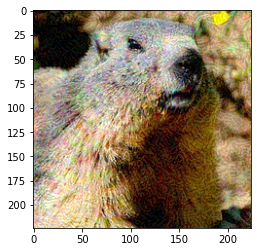

______________


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[('n01833805', 'hummingbird', 0.37398493), ('n01806143', 'peacock', 0.1690952), ('n02396427', 'wild_boar', 0.132392)]


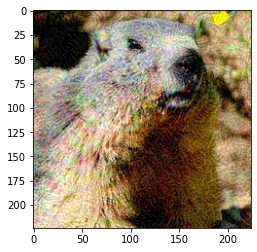

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


______________
[('n01806143', 'peacock', 0.22027372), ('n02396427', 'wild_boar', 0.19234157), ('n02395406', 'hog', 0.16153882)]


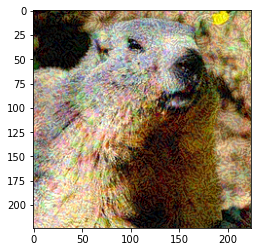

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


______________
[('n02396427', 'wild_boar', 0.239279), ('n02395406', 'hog', 0.23213091), ('n01806143', 'peacock', 0.20469251)]


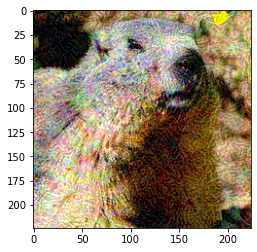

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


______________
[('n01806143', 'peacock', 0.30852127), ('n02396427', 'wild_boar', 0.19383237), ('n02395406', 'hog', 0.15227401)]


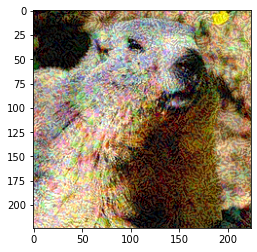

 25%|██▌       | 1/4 [00:55<02:46, 55.53s/it]

______________
[('n02361337', 'marmot', 0.99636286), ('n02363005', 'beaver', 0.0035085368), ('n02444819', 'otter', 4.556007e-05)]


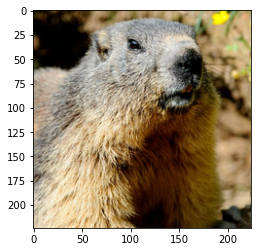

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


______________
[('n02361337', 'marmot', 0.9001356), ('n02444819', 'otter', 0.034068476), ('n02443484', 'black-footed_ferret', 0.019765802)]


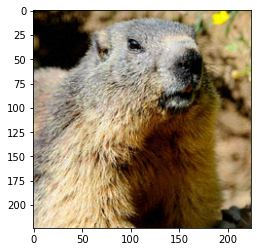

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


______________
[('n02443484', 'black-footed_ferret', 0.77115786), ('n02444819', 'otter', 0.05911722), ('n02137549', 'mongoose', 0.043697648)]


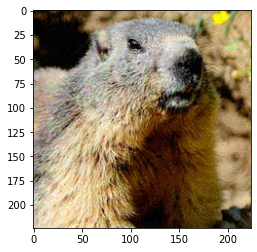

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


______________
[('n02443484', 'black-footed_ferret', 0.8694683), ('n02444819', 'otter', 0.047454536), ('n02441942', 'weasel', 0.02190014)]


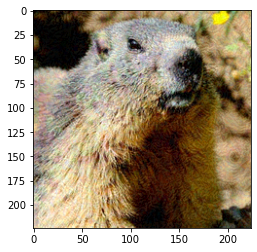

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


______________
[('n02443484', 'black-footed_ferret', 0.8796284), ('n02444819', 'otter', 0.06188431), ('n02443114', 'polecat', 0.015406646)]


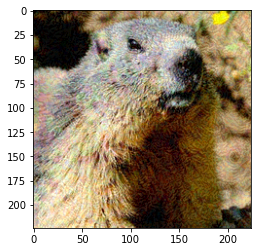

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


______________
[('n02443484', 'black-footed_ferret', 0.8614897), ('n02444819', 'otter', 0.05965285), ('n01806143', 'peacock', 0.015545801)]


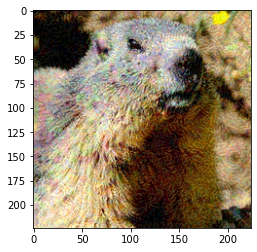

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


______________
[('n02443484', 'black-footed_ferret', 0.7911151), ('n01806143', 'peacock', 0.08112143), ('n02444819', 'otter', 0.029602308)]


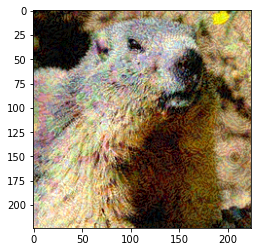

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


______________
[('n02443484', 'black-footed_ferret', 0.58347243), ('n01806143', 'peacock', 0.23535241), ('n01833805', 'hummingbird', 0.04321177)]


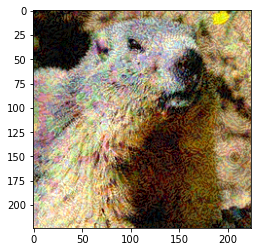

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


______________
[('n01806143', 'peacock', 0.50262713), ('n02443484', 'black-footed_ferret', 0.2074971), ('n02396427', 'wild_boar', 0.10575461)]


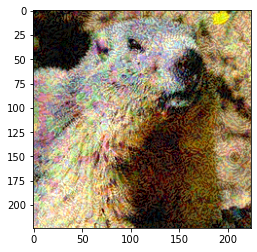

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


______________
[('n01806143', 'peacock', 0.55892605), ('n02396427', 'wild_boar', 0.22059569), ('n02443484', 'black-footed_ferret', 0.042328)]


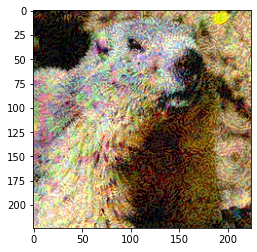

 50%|█████     | 2/4 [01:30<01:26, 43.47s/it]

______________
[('n02361337', 'marmot', 0.99636286), ('n02363005', 'beaver', 0.0035085368), ('n02444819', 'otter', 4.556007e-05)]


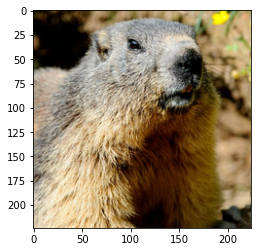

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


______________
[('n02361337', 'marmot', 0.48937705), ('n02134084', 'ice_bear', 0.26409358), ('n02363005', 'beaver', 0.113258556)]


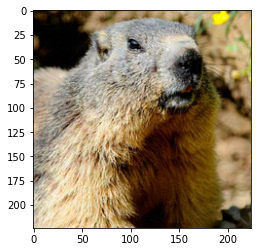

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


______________
[('n02134084', 'ice_bear', 0.38029763), ('n02132136', 'brown_bear', 0.1580237), ('n02111500', 'Great_Pyrenees', 0.11025343)]


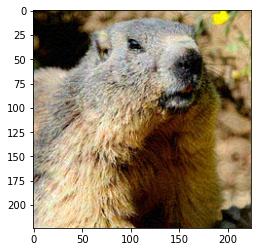

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


______________
[('n01833805', 'hummingbird', 0.30417404), ('n02134084', 'ice_bear', 0.14400086), ('n02132136', 'brown_bear', 0.101760276)]


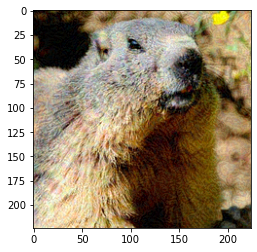

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


______________
[('n01833805', 'hummingbird', 0.39048302), ('n02105505', 'komondor', 0.06949727), ('n02113712', 'miniature_poodle', 0.05932223)]


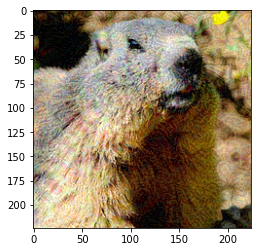

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


______________
[('n02113712', 'miniature_poodle', 0.21976419), ('n02105505', 'komondor', 0.19858451), ('n01833805', 'hummingbird', 0.1139828)]


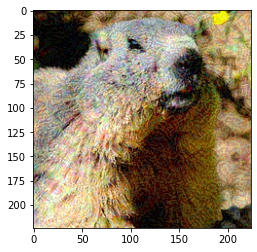

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


______________
[('n02105505', 'komondor', 0.274296), ('n02113712', 'miniature_poodle', 0.18441918), ('n02113799', 'standard_poodle', 0.0458128)]


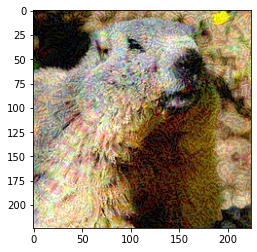

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


______________
[('n02113712', 'miniature_poodle', 0.16253169), ('n02105505', 'komondor', 0.09831099), ('n01917289', 'brain_coral', 0.063711114)]


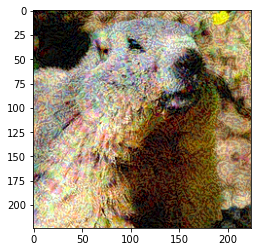

______________


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[('n01917289', 'brain_coral', 0.1293898), ('n02113712', 'miniature_poodle', 0.12929715), ('n09256479', 'coral_reef', 0.08846711)]


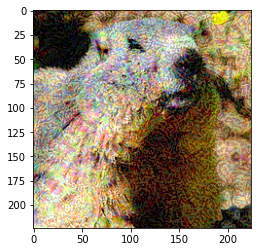

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


______________
[('n01917289', 'brain_coral', 0.23253186), ('n09256479', 'coral_reef', 0.18088852), ('n02113712', 'miniature_poodle', 0.079444475)]


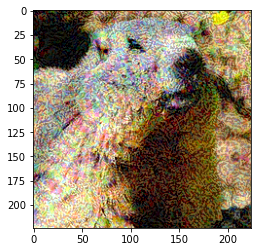

 75%|███████▌  | 3/4 [02:05<00:39, 39.69s/it]

______________
[('n02361337', 'marmot', 0.99636286), ('n02363005', 'beaver', 0.0035085368), ('n02444819', 'otter', 4.556007e-05)]


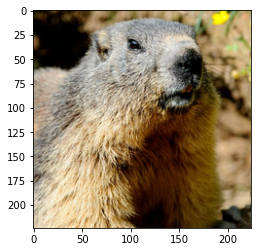

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


______________
[('n02361337', 'marmot', 0.7533532), ('n02444819', 'otter', 0.17679588), ('n02077923', 'sea_lion', 0.022349274)]


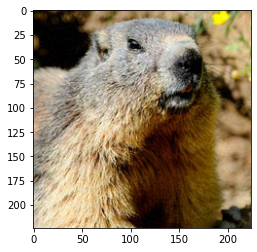

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


______________
[('n02444819', 'otter', 0.29841894), ('n01833805', 'hummingbird', 0.12927462), ('n02443484', 'black-footed_ferret', 0.0756561)]


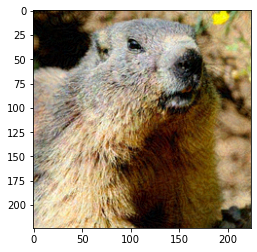

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


______________
[('n01833805', 'hummingbird', 0.59355545), ('n02113712', 'miniature_poodle', 0.093689755), ('n02444819', 'otter', 0.08638919)]


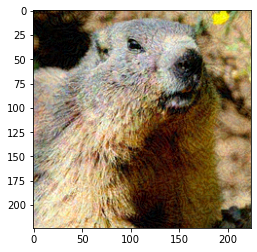

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


______________
[('n01833805', 'hummingbird', 0.51010936), ('n02113712', 'miniature_poodle', 0.23385775), ('n02444819', 'otter', 0.042770766)]


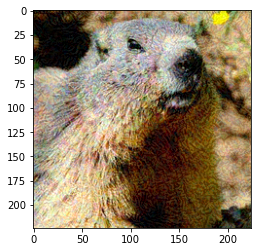

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


______________
[('n01833805', 'hummingbird', 0.33507854), ('n02113712', 'miniature_poodle', 0.27558392), ('n01806143', 'peacock', 0.04133654)]


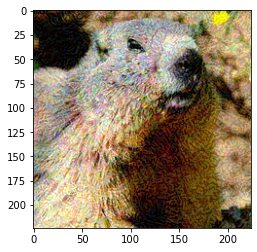

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


______________
[('n01833805', 'hummingbird', 0.24827123), ('n02113712', 'miniature_poodle', 0.1061659), ('n02319095', 'sea_urchin', 0.098665945)]


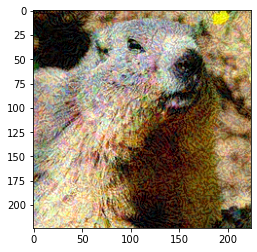

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


______________
[('n02319095', 'sea_urchin', 0.21913974), ('n09256479', 'coral_reef', 0.14826322), ('n01950731', 'sea_slug', 0.07600102)]


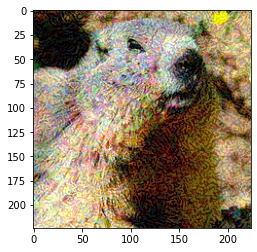

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


______________
[('n02319095', 'sea_urchin', 0.3254293), ('n09256479', 'coral_reef', 0.22059079), ('n01917289', 'brain_coral', 0.11777437)]


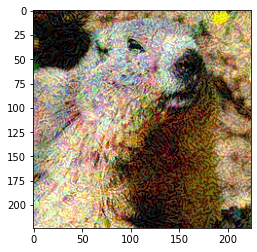

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


______________
[('n02319095', 'sea_urchin', 0.3003059), ('n09256479', 'coral_reef', 0.247366), ('n01917289', 'brain_coral', 0.19976984)]


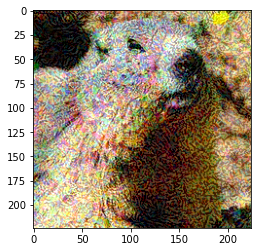

100%|██████████| 4/4 [02:40<00:00, 40.21s/it]

______________


In [20]:
im_ar =  image.img_to_array(im_pil_raw_squared).copy()
im_proc = preprocess_input(np.expand_dims(im_ar.copy(), axis=0))

noise_strengs = np.arange(10) / 2
# iterate over different noise categories
outputs = []
for noise_cat in tqdm(np.random.choice(np.arange(1000), 4, replace=True)):

    baseImage = tf.constant(im_proc, dtype=tf.float32)
    delta = tf.Variable(tf.zeros_like(baseImage), trainable=True)
#     print("[INFO] generating perturbation...")
    deltaUpdated = generate_adversaries(model, baseImage, delta, noise_cat, steps=300, verbose=False)

    adverImage = (baseImage + deltaUpdated).numpy().squeeze()
    adverImage = np.clip(adverImage, 0, 255).astype("uint8")

#     ims_test = [baseImage, deltaUpdated]
#     for ns in noise_strengs:
#         ims_test.append(baseImage + ns * deltaUpdated)
    ims_test = np.concatenate([baseImage + ns * deltaUpdated for ns in noise_strengs], axis=0)
    preds_all = model.predict(ims_test)
    preds_decoded = decode_predictions(preds_all, top=3)
    for ii, p in zip(ims_test, preds_decoded):
        plt.figure()
        plt.imshow(np.round(depreprocess(ii)).astype('int32'))
        print(p)
        plt.show()
        print('______________')
    
    for ns, pred in zip(noise_strengs, preds_decoded):
        sample = [i_path, noise_cat, ns, pred]
        outputs.append(sample)
        
            

In [23]:
outputs

[['/home/ivan/scratch/marmot.jpg',
  172,
  0.0,
  [('n02361337', 'marmot', 0.99636286),
   ('n02363005', 'beaver', 0.0035085368),
   ('n02444819', 'otter', 4.556007e-05)]],
 ['/home/ivan/scratch/marmot.jpg',
  172,
  0.5,
  [('n02361337', 'marmot', 0.591147),
   ('n02134084', 'ice_bear', 0.12861273),
   ('n02444819', 'otter', 0.077271655)]],
 ['/home/ivan/scratch/marmot.jpg',
  172,
  1.0,
  [('n02134084', 'ice_bear', 0.27892253),
   ('n02444819', 'otter', 0.09022235),
   ('n02132136', 'brown_bear', 0.08758153)]],
 ['/home/ivan/scratch/marmot.jpg',
  172,
  1.5,
  [('n01833805', 'hummingbird', 0.25092652),
   ('n02117135', 'hyena', 0.15678175),
   ('n02396427', 'wild_boar', 0.09127199)]],
 ['/home/ivan/scratch/marmot.jpg',
  172,
  2.0,
  [('n01833805', 'hummingbird', 0.43731716),
   ('n02117135', 'hyena', 0.09639796),
   ('n02396427', 'wild_boar', 0.081941344)]],
 ['/home/ivan/scratch/marmot.jpg',
  172,
  2.5,
  [('n01833805', 'hummingbird', 0.5313603),
   ('n01806143', 'peacock', 0